In [4]:
import torch
import os
import sys
sys.path.append('/home/bas06400/Thesis/VIP/src/')


from zeta.model_init import initialize_vip_encoder, MultiModalityModel

config1 = {
    "task": "1",
    "number_gpus": "4",
    "modalities": [
        "rgb",
        "ir"
    ],
    "dataset": "NTU",
    "split": "CV",
    "overfit_on_one_batch": False,
    "num_classes": 60,
    "in_features": 512,
    "epochs": 10,
    "res_cktp": False,
    "cktp_dir": "/home/bas06400/Thesis/VIP/src/align_checkpoints",
    "aligned_model": "checkpoint_rgb_ir_0_20240109_141140.pth",
    "learning_rate": 0.0001,
    "gradient_accumulation_steps": 2,
    "scheduler_config": {
        "type": "step",
        "params": {
            "step_size": 4,
            "gamma": 0.1
        }
    },
    "temperature": 0.1,
    "num_workers": 20,
    "data_list": "/home/bas06400/Thesis/rgb_ir_dataset.txt",
    "data_root": "/net/polaris/storage/deeplearning/ntu",
    "batch_size": 32,
    "random_sample": False,
    "pin_memory": True,
    "clip_config": "openai/clip-vit-base-patch16",
    "clip_weights": "openai/clip-vit-base-patch16",
    "clip_vision_additional_config": {
        "type": "ViP",
        "temporal_size": 12,
        "if_use_temporal_embed": True,
        "logit_scale_init_value": 4.6,
        "add_cls_num": 3
    },
    "e2e_weights_path": "/home/bas06400/Thesis/model_step_47400 copy.pt"
}
config2 = {
    "task": "1",
    "number_gpus": "4",
    "modalities": [
        "rgb",
        "depth"
    ],
    "dataset": "NTU",
    "split": "CV",
    "overfit_on_one_batch": False,
    "num_classes": 60,
    "in_features": 512,
    "epochs": 10,
    "res_cktp": False,
    "cktp_dir": "/home/bas06400/Thesis/VIP/src/align_checkpoints",
    "aligned_model": "checkpoint_rgb_depth_0_20240107_212321.pth",
    "learning_rate": 0.0001,
    "gradient_accumulation_steps": 2,
    "scheduler_config": {
        "type": "step",
        "params": {
            "step_size": 4,
            "gamma": 0.1
        }
    },
    "temperature": 0.1,
    "num_workers": 20,
    "data_list": "/home/bas06400/Thesis/rgb_ir_dataset.txt",
    "data_root": "/net/polaris/storage/deeplearning/ntu",
    "batch_size": 32,
    "random_sample": False,
    "pin_memory": True,
    "clip_config": "openai/clip-vit-base-patch16",
    "clip_weights": "openai/clip-vit-base-patch16",
    "clip_vision_additional_config": {
        "type": "ViP",
        "temporal_size": 12,
        "if_use_temporal_embed": True,
        "logit_scale_init_value": 4.6,
        "add_cls_num": 3
    },
    "e2e_weights_path": "/home/bas06400/Thesis/model_step_47400 copy.pt"
}


def load_model(config):
    
    modalities_encoders = {}
    for modality in config['modalities']:
        freeze = True
        encoder = initialize_vip_encoder(config, modality=modality, freeze=freeze)
        modalities_encoders[modality] = encoder

    multi_modality_model = MultiModalityModel(modalities_encoders, config['num_classes'], config['in_features'])
  
    cktp = torch.load(os.path.join(config['cktp_dir'], config['aligned_model']))
    new_state_dict = {}
    for name, param in cktp['model_state_dict'].items():
        if name in multi_modality_model.state_dict() and param.size() == multi_modality_model.state_dict()[name].size():
            new_state_dict[name] = param

    multi_modality_model.load_state_dict(new_state_dict, strict=False)

    return multi_modality_model

def compare_rgb_encoders(model1, model2):
    # Extract the RGB encoders from each model
    rgb_encoder_model1 = model1.modalities_encoders['rgb']
    rgb_encoder_model2 = model2.modalities_encoders['rgb']

    # Iterate through each parameter in the RGB encoder
    for param1, param2 in zip(rgb_encoder_model1.parameters(), rgb_encoder_model2.parameters()):
        # Check if the weights are identical
        if not torch.equal(param1, param2):
            return False
    
    return True

# Example usage
model1 = load_model(config1)
model2 = load_model(config2)

are_identical = compare_rgb_encoders(model1, model2)
print("RGB Encoders are identical:", are_identical)


Some weights of CLIPModel were not initialized from the model checkpoint at openai/clip-vit-base-patch16 and are newly initialized: ['vision_model.embeddings.temporal_embedding', 'vision_model.embeddings.added_cls']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adjusting state dictionary for fine-tuned model.


Some weights of CLIPModel were not initialized from the model checkpoint at openai/clip-vit-base-patch16 and are newly initialized: ['vision_model.embeddings.temporal_embedding', 'vision_model.embeddings.added_cls']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adjusting state dictionary for fine-tuned model.


Some weights of CLIPModel were not initialized from the model checkpoint at openai/clip-vit-base-patch16 and are newly initialized: ['vision_model.embeddings.temporal_embedding', 'vision_model.embeddings.added_cls']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adjusting state dictionary for fine-tuned model.


Some weights of CLIPModel were not initialized from the model checkpoint at openai/clip-vit-base-patch16 and are newly initialized: ['vision_model.embeddings.temporal_embedding', 'vision_model.embeddings.added_cls']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Adjusting state dictionary for fine-tuned model.
RGB Encoders are identical: True


In [1]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from evl.vision_transformer import VisionTransformer2D
from evl.model import EVLTransformer
from collections import OrderedDict
import os
from tqdm import tqdm
import clip


cktp = torch.load()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [ ]:
/home/bas06400/lowresvidstest/rgb

In [3]:
import os

# Set your original and low-resolution directories
original_data_dir = '/net/polaris/storage/deeplearning/ntu/nturgb+d_rgb'  # replace with the path to your original data directory
lowres_data_dir = '/home/bas06400/lowresvidstest/rgb/nturgb+d_rgb/'  # replace with the path to your low-resolution data directory

def find_duplicates(original_dir, lowres_dir):
    # Create sets to hold the filenames of the original and low-res files
    original_files = set(os.listdir(original_dir))
    lowres_files = set(os.listdir(lowres_dir))

    # Convert original filenames to the low-res version
    expected_lowres_files = set(f"{os.path.splitext(file)[0]}_low_res.avi" for file in original_files if '_rgb' in file or '_ir' in file)

    # Find any low-res files that don't have a corresponding original file
    extra_files = lowres_files - expected_lowres_files

    return extra_files

# Find duplicates
duplicates = find_duplicates(original_data_dir, lowres_data_dir)

# Print out the duplicates
print("Extra files in low-resolution directory:")
for file in duplicates:
    print(file)

Extra files in low-resolution directory:


In [4]:
# Path to the extra file
extra_file_path = os.path.join(lowres_data_dir, 'nturgb+d_rgb')

# Check if the file exists
if os.path.exists(extra_file_path):
    # If it's a file, remove it
    if os.path.isfile(extra_file_path):
        os.remove(extra_file_path)
        print(f"Removed file: {extra_file_path}")
    # If it's a directory, decide how you want to handle it (e.g., remove or investigate further)
    elif os.path.isdir(extra_file_path):
        print(f"Directory found: {extra_file_path}. Please check its contents before taking action.")
else:
    print(f"No such file or directory: {extra_file_path}")

No such file or directory: /home/bas06400/lowresvidstest/rgb/nturgb+d_rgb/nturgb+d_rgb


In [8]:
original_data_dir = '/net/polaris/storage/deeplearning/ntu/nturgb+d_rgb'
filename_list_txt = '/home/bas06400/Thesis/rgb_ir_depth_skeleton_dataset.txt'  # Replace with your text file containing the filenames

def read_filenames_from_txt(filepath):
    with open(filepath, 'r') as file:
        # Extract the first column (filename) from each line
        filenames = [line.split()[0] for line in file if line.strip()]
    return set(filenames)

def strip_first_part(filepath):
    modified_lines = []
    with open(filepath, 'r') as file:
        for line in file:
            # Strip off the newline character and everything before and including the last slash
            modified_line = line.strip().split('/')[-1]
            modified_lines.append(modified_line)

    return modified_lines

def compare_filenames(dir_path, filenames_set):
    # Get a set of all filenames in the directory
    dir_filenames = {f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))}

    # Find differences
    missing_in_dir = filenames_set - dir_filenames
    extra_in_dir = dir_filenames - filenames_set

    return missing_in_dir, extra_in_dir

# Read filenames from the text file
filenames_from_txt = strip_first_part(read_filenames_from_txt(filename_list_txt))

# Compare filenames from the directory and the text file
missing_in_dir, extra_in_dir = compare_filenames(original_data_dir, filenames_from_txt)

# Report results
if missing_in_dir:
    print(f"Files listed in the text file but missing in the directory ({len(missing_in_dir)}):")
    for f in missing_in_dir:
        print(f)

if extra_in_dir:
    print(f"\nFiles in the directory but not listed in the text file ({len(extra_in_dir)}):")
    for f in extra_in_dir:
        print(f)

if not missing_in_dir and not extra_in_dir:
    print("All files in the directory match the list in the text file.")

Files listed in the text file but missing in the directory (56880):
nturgb+d_rgb/S014C001P037R001A008_rgb.avi
nturgb+d_rgb/S013C001P008R002A034_rgb.avi
nturgb+d_rgb/S015C001P007R001A005_rgb.avi
nturgb+d_rgb/S001C001P007R001A060_rgb.avi
nturgb+d_rgb/S008C003P034R002A035_rgb.avi
nturgb+d_rgb/S010C003P016R001A001_rgb.avi
nturgb+d_rgb/S010C003P016R002A041_rgb.avi
nturgb+d_rgb/S011C003P019R002A031_rgb.avi
nturgb+d_rgb/S014C003P025R001A050_rgb.avi
nturgb+d_rgb/S015C001P019R002A054_rgb.avi
nturgb+d_rgb/S001C001P006R002A021_rgb.avi
nturgb+d_rgb/S002C003P007R002A003_rgb.avi
nturgb+d_rgb/S001C002P001R002A034_rgb.avi
nturgb+d_rgb/S003C001P019R002A033_rgb.avi
nturgb+d_rgb/S005C002P016R002A018_rgb.avi
nturgb+d_rgb/S005C001P013R001A009_rgb.avi
nturgb+d_rgb/S007C003P028R002A035_rgb.avi
nturgb+d_rgb/S003C001P015R002A010_rgb.avi
nturgb+d_rgb/S008C003P019R002A007_rgb.avi
nturgb+d_rgb/S010C002P019R001A053_rgb.avi
nturgb+d_rgb/S013C003P017R002A049_rgb.avi
nturgb+d_rgb/S016C003P039R002A035_rgb.avi
nturgb+d

In [ ]:
# Define the training subject IDs
training_subjects = {'01', '02', '04', '05', '08', '09', '13', '14', '15', '16', '17', '18', '19', '25', '27', '28', '31', '34', '35', '38'}

# Function to extract the subject ID from the file path
def get_subject_id(file_path):
    start = file_path.find('P') + 2
    end = file_path.find('R', start)
    return file_path[start:end]

# Splitting the dataset
with open('rgb_ir_depth_skeleton_dataset.txt', 'r') as infile, \
     open('CS_training_set.txt', 'w') as train_file, \
     open('CS_testing_set.txt', 'w') as val_file:

    for line in infile:
        # Assuming the subject ID is in the second file path in the line
        file_paths = line.strip().split()
        subject_id = get_subject_id(file_paths[1]).zfill(2)  # Zero-pad for consistency

        if subject_id in training_subjects:
            train_file.write(line)
        else:
            val_file.write(line)

In [4]:
# Define the training subject IDs
training_subjects = {'001', '002', '004', '005', '008', '009', '013', '014', '015', '016', '017', '018', '019', '025', '027', '028', '031', '034', '035', '038', '045', 
                    '046', '047', '049', '050', '052', '053', '054', '055', '056', '057', '058', '059', '070', '074', '078', '080', '081', '082', '083', '084', 
                    '085', '086', '089', '091', '092', '093', '094', '095', '097', '098', '100', '103'}



# Function to extract the subject ID from the file path
def get_subject_id(file_path):
    start = file_path.find('P') + 1
    end = file_path.find('R', start)
    return file_path[start:end]

# Splitting the dataset
with open('rgb_ir_depth_skeleton_120dataset_low_res.txt', 'r') as infile, \
     open('CS120_training_set.txt', 'w') as train_file, \
     open('CS120_testing_set.txt', 'w') as val_file:

    for line in infile:
        # Assuming the subject ID is in the second file path in the line
        file_paths = line.strip().split()
        subject_id = get_subject_id(file_paths[1]).zfill(2)  # Zero-pad for consistency

        if subject_id in training_subjects:
            train_file.write(line)
        else:
            val_file.write(line)

In [6]:
# Function to extract the camera ID from the file path
def get_camera_id(file_path):
    start = file_path.find('C') + 1
    end = file_path.find('P', start)
    return file_path[start:end]

# Splitting the dataset for cross-view evaluation
with open('rgb_ir_depth_skeleton_dataset.txt', 'r') as infile, \
     open('CV_training_set.txt', 'w') as train_file, \
     open('CV_testing_set.txt', 'w') as val_file:

    for line in infile:
        # Assuming the camera ID is in the first file path in the line
        file_paths = line.strip().split()
        camera_id = get_camera_id(file_paths[0]).zfill(3)  # Zero-pad for consistency

        if camera_id in {'002', '003'}:
            train_file.write(line)
        elif camera_id == '001':
            val_file.write(line)

In [ ]:
# Function to extract the setup ID from the file path
def get_setup_id(file_path):
    start = file_path.find('S') + 1
    end = file_path.find('C', start)
    return file_path[start:end]

# Splitting the dataset for cross-setup evaluation
with open('rgb_ir_depth_skeleton_120dataset_low_res.txt', 'r') as infile, \
     open('CS120_training_set.txt', 'w') as train_file, \
     open('CS120_testing_set.txt', 'w') as test_file:

    for line in infile:
        # Assuming the setup ID is in the first file path in the line
        file_paths = line.strip().split()
        setup_id = int(get_setup_id(file_paths[0]))  # Convert to integer for even/odd check

        if setup_id % 2 == 0:  # Even setup IDs for training
            train_file.write(line)
        else:  # Odd setup IDs for testing
            test_file.write(line)


In [2]:
def count_files(directory):
    file_count = 0
    # Walk through all directories and files in the specified directory
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Replace 'your_directory_path' with the path to the directory you want to check
directory_path = '/net/polaris/storage/deeplearning/ntu/nturgb+d_depth_masked/'
print(f"Number of files in '{directory_path}': {count_files(directory_path)}")

Number of files in '/net/polaris/storage/deeplearning/ntu/nturgb+d_depth_masked/': 4807016


In [2]:
import os
def count_directories(directory):
    # List all entries in the directory and count only directories
    return len([entry for entry in os.listdir(directory) if os.path.isdir(os.path.join(directory, entry))])

# Replace 'your_directory_path' with the path to the directory you want to check
directory_path = '/net/polaris/storage/deeplearning/ntu/test/'
print(f"Number of directories in '{directory_path}': {count_directories(directory_path)}")

KeyboardInterrupt: 

In [12]:
def count_files(directory):
    file_count = 0
    # Walk through all directories and files in the specified directory
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Replace 'your_directory_path' with the path to the directory you want to check
directory_path = '/net/polaris/storage/deeplearning/ntu/nturgb+d_skeletons_npy/'
print(f"Number of files in '{directory_path}': {count_files(directory_path)}")

Number of files in '/net/polaris/storage/deeplearning/ntu/nturgb+d_skeletons_npy/': 56880


In [3]:
def load_model_from_checkpoint(model, checkpoint_path):
    """
    Loads a model's state dictionary from a checkpoint without the "module." prefix.
    
    Parameters:
    - model (torch.nn.Module): The model to which the state dictionary will be loaded.
    - checkpoint_path (str): Path to the checkpoint file.

    Returns:
    - model (torch.nn.Module): The model with its state dictionary loaded from the checkpoint.
    """

    # Load the checkpoint
    ckpt = torch.load(checkpoint_path)

    # Create a new state dictionary without the "module." prefix
    new_state_dict = OrderedDict()
    for key, value in ckpt['model'].items():
        name = key[7:]  # remove the "module." prefix
        new_state_dict[name] = value

    # Load the state dictionary into the model
    model.load_state_dict(new_state_dict)

    return model

In [4]:
class CLIPModelx(nn.Module):
    def __init__(self):
        super(CLIPModelx, self).__init__()
        self.rgb_model = EVLTransformer(backbone_path='/home/bas06400/.cache/clip/ViT-B-16.pt')
        self.ir_model = EVLTransformer(backbone_path='/home/bas06400/.cache/clip/ViT-B-16.pt')
        checkpoint_path = '/home/bas06400/schlaf/model_weights/k400_vitb16_8f_dec4x768.pth'
        self.rgb_model = load_model_from_checkpoint(self.rgb_model,checkpoint_path)
        load_model_from_checkpoint(self.ir_model,checkpoint_path)

        # Projection layers to transform 400D embeddings to 512D
        self.rgb_projection = nn.Linear(400, 512)
        self.ir_projection = nn.Linear(400, 512)


    def forward(self, image, text):
        
        # Get 400D embeddings from RGB and IR models
        rgb_features_400D = self.rgb_model(image)
        ir_features_400D = self.ir_model(text)
        
        # Project the 400D embeddings to 512D
        rgb_features = rgb_features_400D #self.rgb_projection(rgb_features_400D)
        ir_features = ir_features_400D #self.ir_projection(ir_features_400D)
        return rgb_features, ir_features

model = CLIPModelx()
model

CLIPModelx(
  (rgb_model): EVLTransformer(
    (decoder): EVLDecoder(
      (decoder_layers): ModuleList(
        (0-3): 4 x TransformerDecoderLayer(
          (attn): Attention(
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (mlp): Sequential(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (act): QuickGELU()
            (dropout): Dropout(p=0.5, inplace=False)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )

In [7]:


def generate_list_file(data_root, output_file):
    # List all files for each modality
    modalities = ['nturgb+d_rgb', 'nturgb+d_ir']
    modality_files = {modality: sorted(os.listdir(os.path.join(data_root, modality))) for modality in modalities}
    
    with open(output_file, 'w') as f:
        # Iterate over files in the RGB modality as a reference
        for rgb_file in modality_files['nturgb+d_rgb']:
            # Extract the prefix from the RGB file name
            prefix = rgb_file.rsplit('_', 1)[0]
            
            # Find corresponding files in other modalities
            paths = [os.path.join(modality, prefix + '_' + modality.split('_')[-1] + '.avi') for modality in modalities]
            
            # Extract the action label from the filename
            action_label = rgb_file.split('A')[-1].split('_')[0]
            
            # Write to the file
            f.write(' '.join(paths) + ' ' + action_label + '\n')

data_root = "/home/bas06400/ntu"
output_file = "rgb_ir_depth_dataset.txt"
generate_list_file(data_root, output_file)

In [1]:
# Define the original and replacement parts for the paths
replacements = {
    'nturgb+d_rgb/': 'nturgb+d_rgb_low_res/',
    'nturgb+d_ir/': 'nturgb+d_ir_low_res/',
    '_rgb.': '_rgb_low_res.',
    '_ir.': '_ir_low_res.',
}

def replace_path(path):
    for original, replacement in replacements.items():
        path = path.replace(original, replacement)
    return path

def process_file(original_file, new_file):
    with open(original_file, 'r') as file:
        lines = file.readlines()
    
    with open(new_file, 'w') as file:
        for line in lines:
            new_line = replace_path(line)
            file.write(new_line)

# Example usage
original_file = '/home/bas06400/Thesis/rgb_ir_depth_skeleton_120dataset.txt'  # This should be the path to your original text file
new_file = '/home/bas06400/Thesis/rgb_ir_depth_skeleton_120dataset_low_res.txt'  # This will be the new file with updated paths

process_file(original_file, new_file)


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [ ]:
import os
def generate_list_file(data_root, output_file):
    # List all files for each modality
    modalities = ['nturgb+d_rgb_low_res2', 'nturgb+d_ir_low_res2']
    modality_files = {modality: sorted(os.listdir(os.path.join(data_root, modality))) for modality in modalities}
    
    # List all subfolders for the depth modality
    depth_folders = sorted(os.listdir(os.path.join(data_root, 'nturgb+d_depth_masked')))
    
    with open(output_file, 'w') as f:
        # Iterate over files in the RGB modality as a reference
        for rgb_file in modality_files['nturgb+d_rgb']:
            # Extract the prefix from the RGB file name
            prefix = rgb_file.rsplit('_', 1)[0]
            
            # Find corresponding files in other modalities
            paths = [os.path.join(modality, prefix + '_' + modality.split('_')[-1] + '.avi') for modality in modalities]

            # Construct the depth folder path directly using the same prefix
            depth_folder_path = os.path.join('nturgb+d_depth_masked', prefix)
            
            # Construct the skeleton data path
            skeleton_data_path = os.path.join('nturgb+d_skeleton', prefix + '.skeleton.npy')
            
            # Extract the action label from the filename
            action_label = rgb_file.split('A')[-1].split('_')[0]
            
            # Write RGB, IR, depth, and skeleton paths to the file
            f.write(' '.join(paths + [depth_folder_path, skeleton_data_path]) + ' ' + action_label + '\n')

data_root = "/net/polaris/storage/deeplearning/ntu"
output_file = "rgb_ir_depth_skeleton_120dataset_low_res.txt"
generate_list_file(data_root, output_file)

: 

In [1]:
from VIP.src.zeta.multimodal_dataset import MultiModalVideoDataset3
from torch.utils.data import random_split

data_root = '/net/polaris/storage/deeplearning/ntu'
data_list = '/home/bas06400/Thesis/rgb_ir_depth_skeleton_dataset.txt'
data = MultiModalVideoDataset3(data_list, data_root, ['rgb','ir', 'depth','skeleton'], random_sample=False)

item , label= data[0]
print(item['rgb'].shape, item['ir'].shape, item['skeleton'].shape,label)

# Calculate lengths of splits
total_len = len(data)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

# Split the dataset
train_data, val_data, test_data = random_split(data, [train_len, val_len, test_len])


for idx in range(len(train_data)):
    x, y, z, a = train_data[idx][0]
    del x, y, z, a
    break





The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
torch.Size([12, 3, 224, 224]) torch.Size([12, 1, 224, 224]) torch.Size([12, 1, 25, 3]) 1


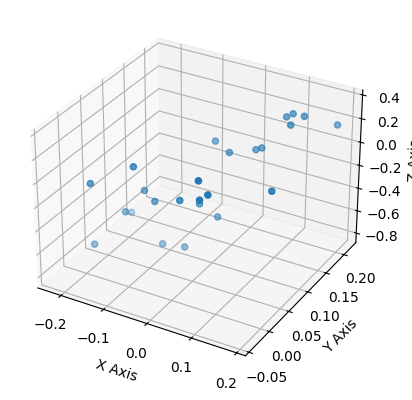

In [3]:
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# Select the first frame
frame = item['skeleton'][0, 0, 7, :, :]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, and z coordinates
x, y, z = frame[:, 0], frame[:, 1], frame[:, 2]

# Plot each joint
ax.scatter(x, y, z)

# Optionally: Add lines between joints here

# Set labels and show plot
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

In [3]:
import sys
sys.path.append('/home/bas06400/Thesis/VIP/src/')



In [4]:
from zeta.model_init import initialize_vip_encoder, MultiModalityModel
import json
import torch.nn as nn
import torch

with open('/home/bas06400/Thesis/VIP/src/configs/alignment_config/test2.json') as f:
        config = json.load(f)

modality_encoder = {'skeleton':initialize_vip_encoder(config, 'skeleton' ,False)}

multi_modality_model = MultiModalityModel(modality_encoder, 60 , 512)
#modality_encoder['skeleton'].vision_model.embeddings.patch_embedding = nn.Conv2d(1, 768, kernel_size=(1, 3), stride=(1, 3), bias=False)
#modality_encoder['skeleton'].vision_model.embeddings.position_embedding = nn.Embedding(26, 768)
#modality_encoder['skeleton'].vision_model.embeddings.register_buffer("position_ids", torch.arange(26).expand((1, -1)))
#print(modality_encoder['skeleton'])
#print(modality_encoder['skeleton'].vision_model.embeddings.num_positions)

Some weights of CLIPModel were not initialized from the model checkpoint at openai/clip-vit-base-patch16 and are newly initialized: ['vision_model.embeddings.added_cls', 'vision_model.embeddings.temporal_embedding']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
sample_idx = 0
modality_frames, label = data[sample_idx]
print(modality_frames['skeleton'].unsqueeze(0).shape)

x = multi_modality_model.forward_encoder('skeleton', modality_frames['skeleton'].unsqueeze(0))
print(x.shape)

torch.Size([1, 12, 1, 25, 3])
torch.Size([1, 512])


In [21]:
import torch
import torch.nn as nn

class CustomViPEmbeddings(nn.Module):
    def __init__(self, num_patches=26, embed_dim=768):
        super(CustomViPEmbeddings, self).__init__()
        # Conv2d layer for patch embedding
        self.patch_embedding = nn.Conv2d(1, embed_dim, kernel_size=(1, 3), stride=(1, 1), bias=False)
        
        # Positional embedding layer
        self.position_embedding = nn.Embedding(num_patches, embed_dim)

        # Initialize the position ids
        self.register_buffer("position_ids", torch.arange(num_patches).expand((1, -1)))

    def forward(self, x):
        # Apply the patch embedding convolution
        x = self.patch_embedding(x)
        print(x.shape)
        # Flattening and transposing to get the correct shape
        x = x.flatten(2).transpose(1, 2)
        
        # Add positional embeddings
        position_embeddings = self.position_embedding(self.position_ids)
        x = x + position_embeddings

        return x

# Example Usage
batch_size = 12
num_joints = 25  # Number of joints (assuming 25 for skeleton data)
input_channels = 1  # Number of channels in the input (assuming 1 for 2D coordinates)

# Create an instance of the CustomViPEmbeddings model
model = CustomViPEmbeddings()

# Example input tensor representing skeleton data
input_tensor = torch.randn(batch_size, input_channels, num_joints, 2)

# Forward pass through the model
output = model(input_tensor)
print(output.shape)  # Should be [batch_size, num_patches, embed_dim]

torch.Size([12, 768, 25, 1])


RuntimeError: The size of tensor a (25) must match the size of tensor b (26) at non-singleton dimension 1

Modality: rgb, Total Frames: 12


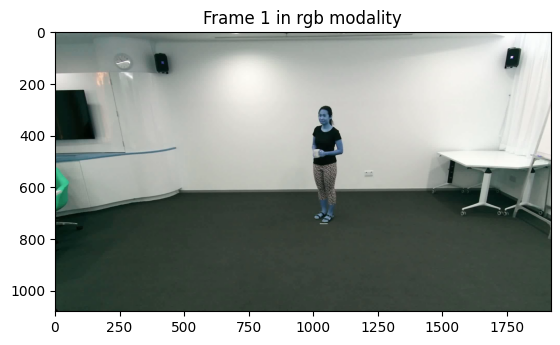

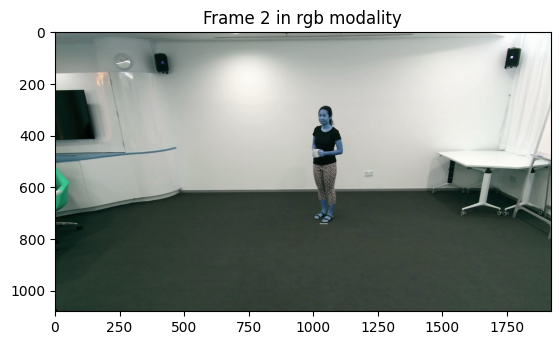

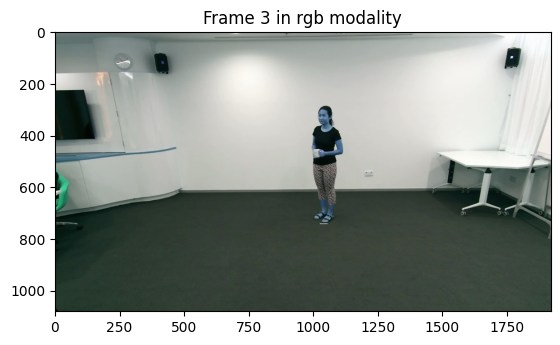

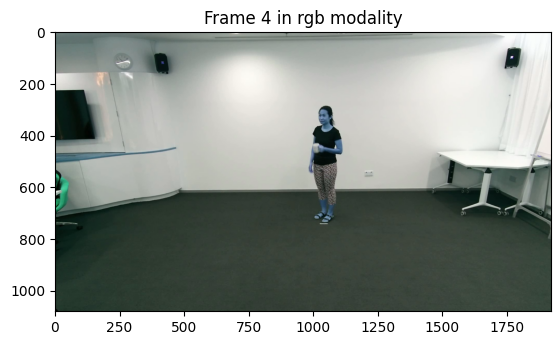

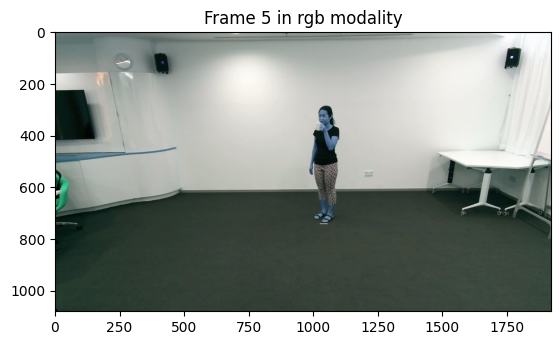

Modality: ir, Total Frames: 12


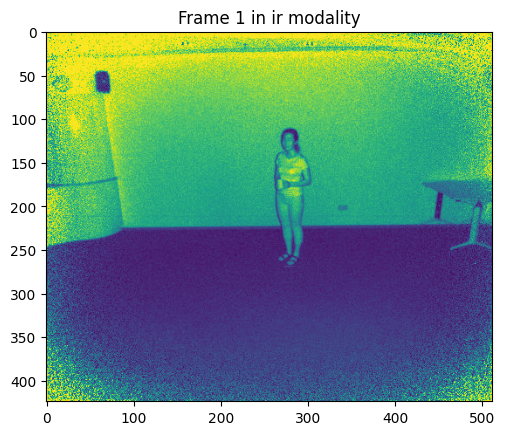

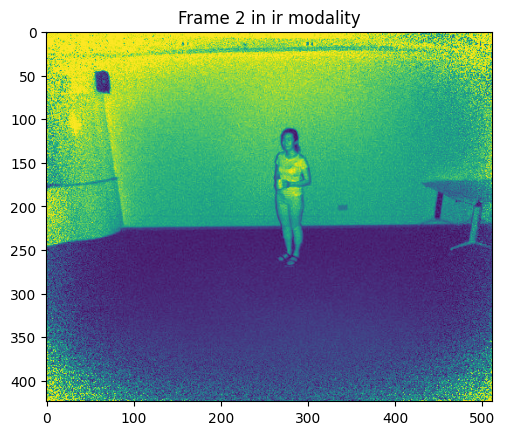

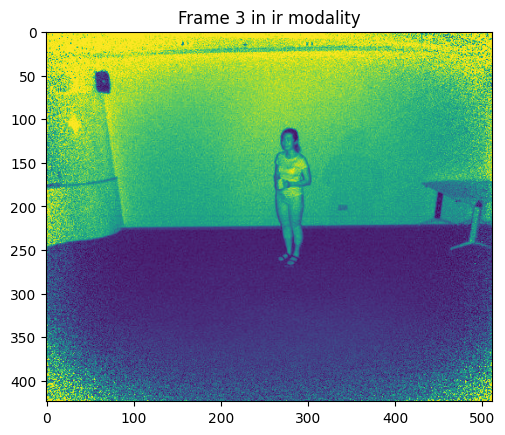

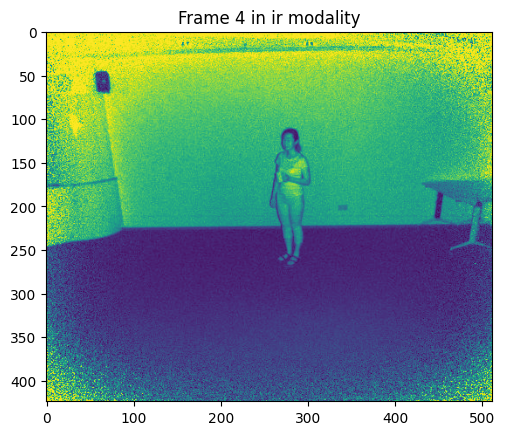

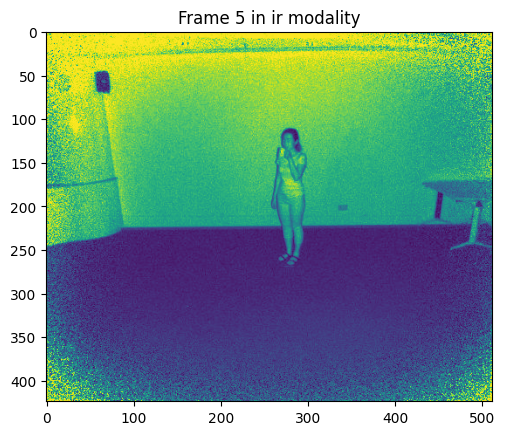

Modality: depth, Total Frames: 12


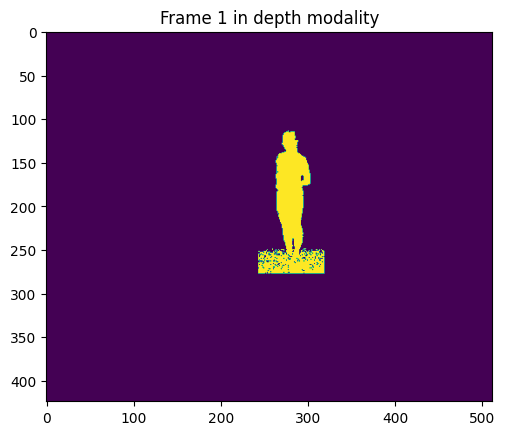

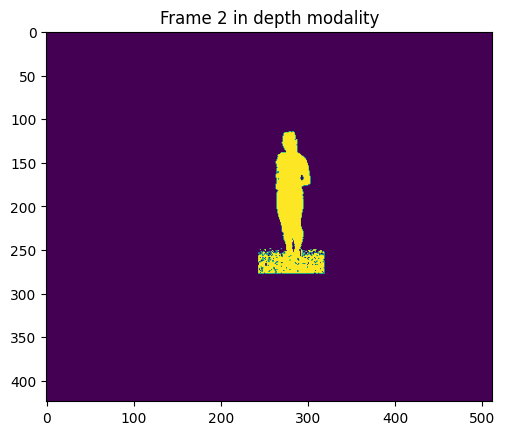

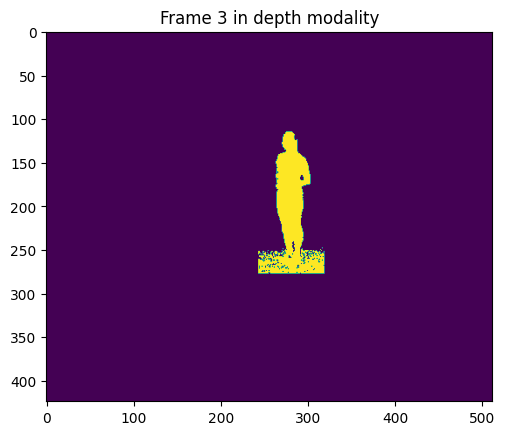

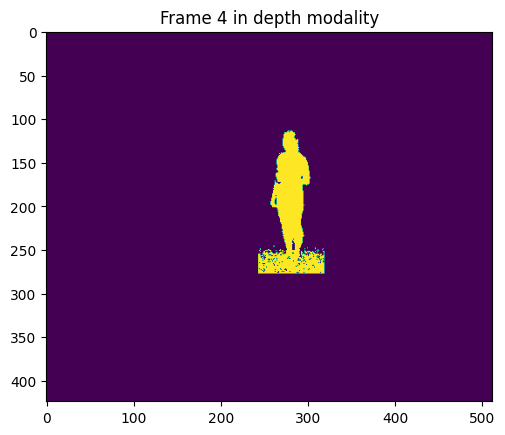

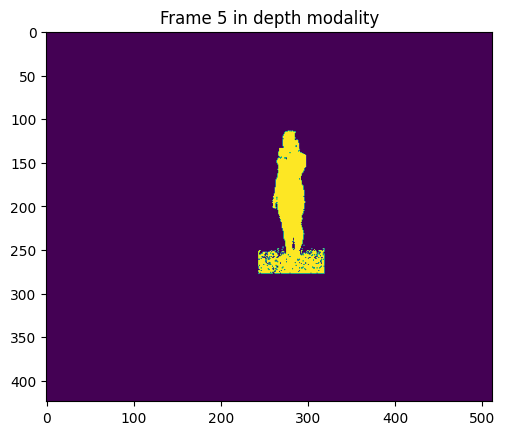

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Function to convert a tensor to an image
def tensor_to_image(tensor):
    # If the tensor has a channel dimension at the end, move it to the beginning
    if tensor.shape[-1] in [1, 3]:  # Grayscale or RGB
        tensor = tensor.permute(2, 0, 1)
    
    # Convert to PIL Image for easy visualization
    return transforms.ToPILImage()(tensor)

# Select a single sample from the dataset
sample_idx = 0
modality_frames, label = data[sample_idx]

# Iterate through each modality in the sample
for modality in modality_frames:
    frames = modality_frames[modality]
    print(f"Modality: {modality}, Total Frames: {len(frames)}")

    # Display the first few frames in this modality
    for i, frame_tensor in enumerate(frames):
        if i >= 5:  # Limit the number of frames to display
            break

        image = tensor_to_image(frame_tensor)
        plt.imshow(image)
        plt.title(f"Frame {i+1} in {modality} modality")
        plt.show()

Modality: rgb, Total Frames: 12


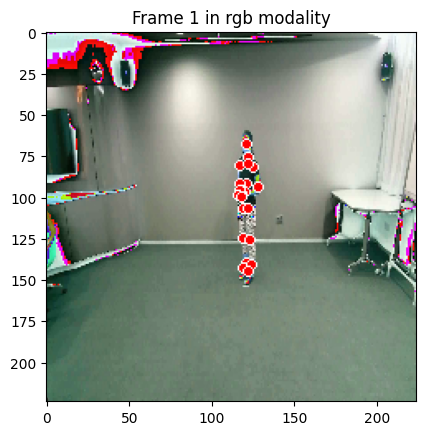

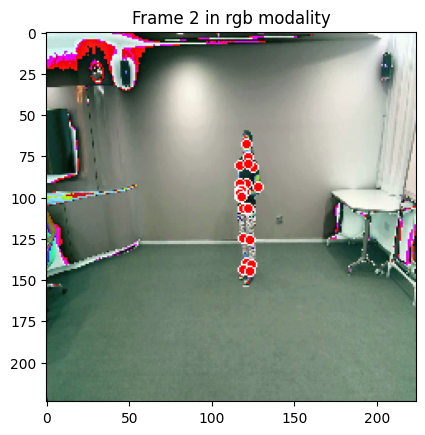

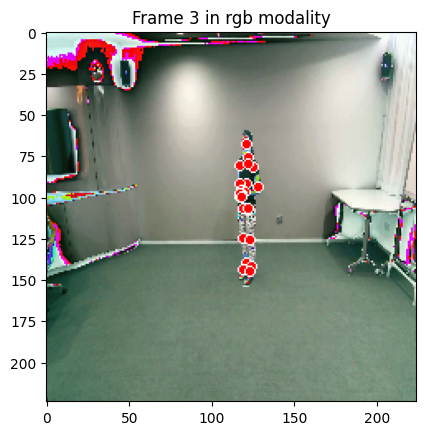

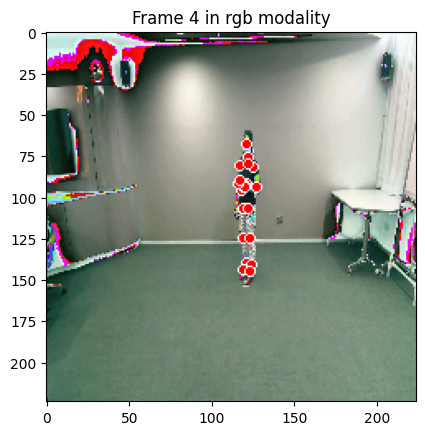

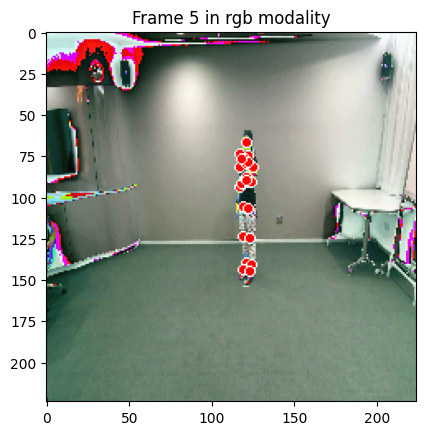

Modality: ir, Total Frames: 12


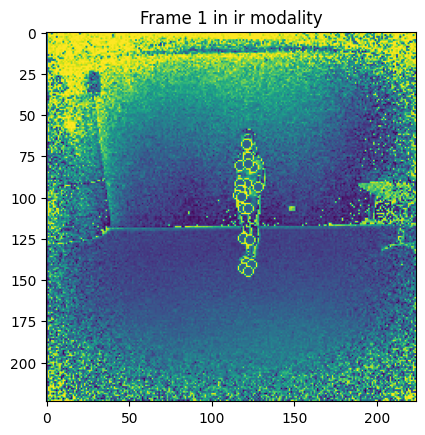

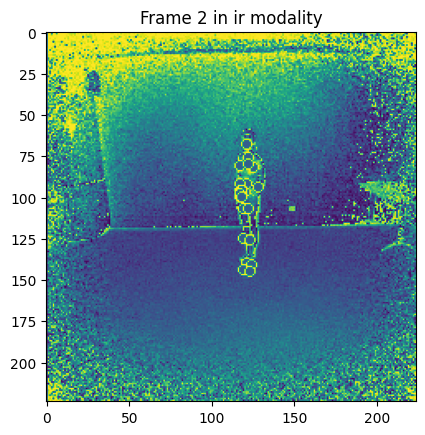

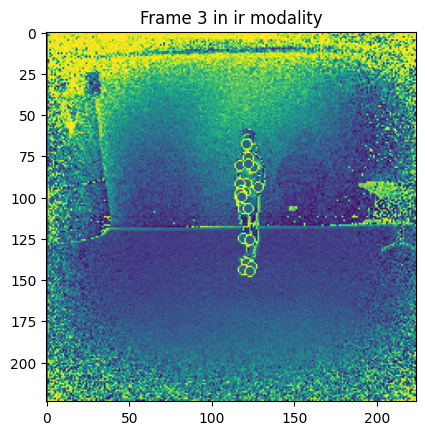

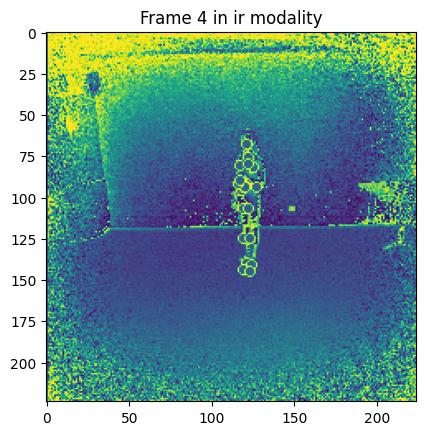

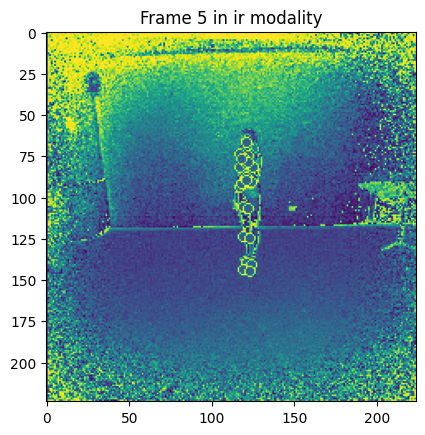

Modality: depth, Total Frames: 12


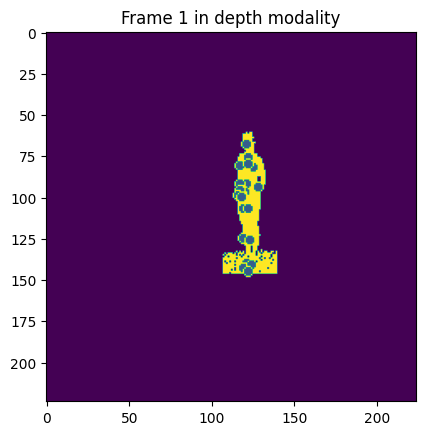

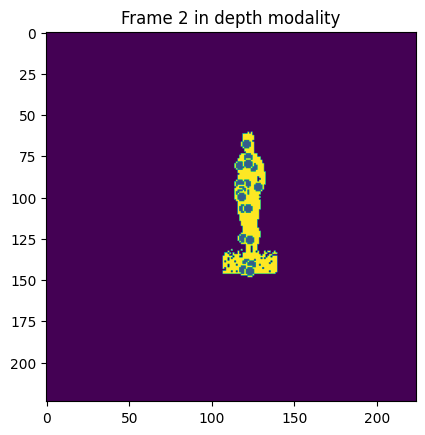

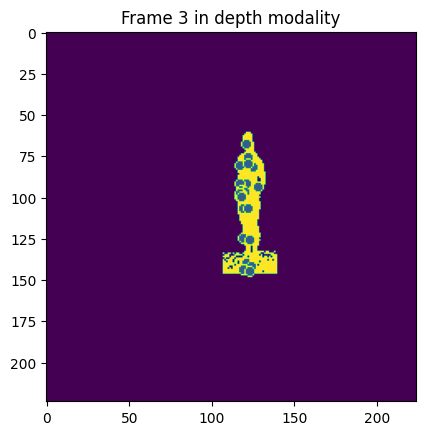

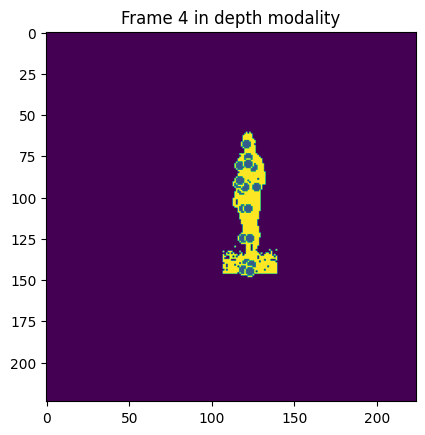

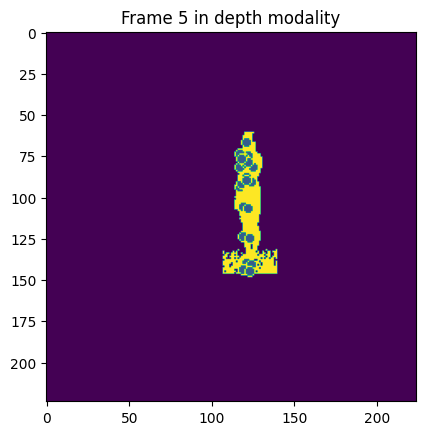

Modality: skeleton, Total Frames: 12


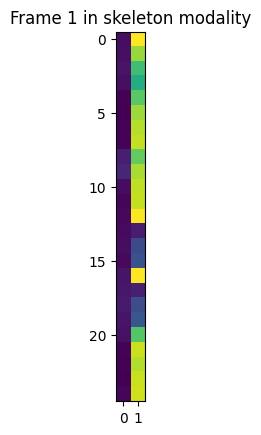

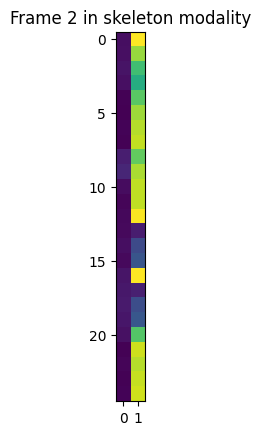

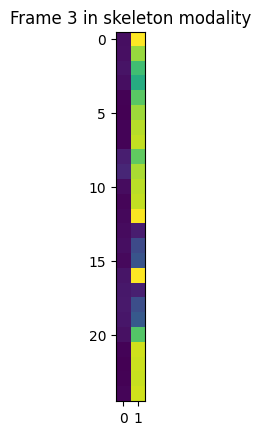

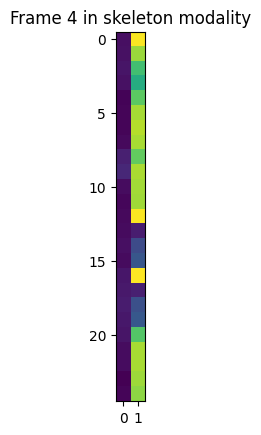

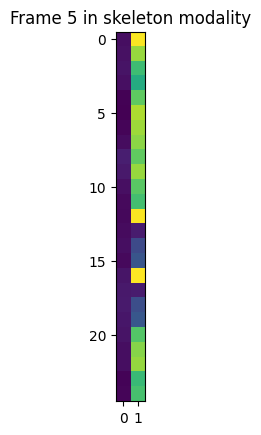

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image, ImageDraw


# Function to convert a tensor to an image
def tensor_to_image(tensor):
    # If the tensor has a channel dimension at the end, move it to the beginning
    if tensor.shape[-1] in [1, 3]:  # Grayscale or RGB
        tensor = tensor.permute(2, 0, 1)
    
    # Convert to PIL Image for easy visualization
    return transforms.ToPILImage()(tensor)

# Function to overlay skeleton points on a frame
def overlay_skeleton_points_on_frame(frame, skeleton):
    # Convert to PIL Image if necessary
    if not isinstance(frame, Image.Image):
        frame = transforms.ToPILImage()(frame)

    # Draw the skeleton points on the frame
    draw = ImageDraw.Draw(frame)
    for joint in skeleton:
        x, y = joint
        draw.ellipse((x-3, y-3, x+3, y+3), fill='red', outline='white')  # Draw joint points

    return frame
# Select a single sample from the dataset
sample_idx = 0
modality_frames, label = data[sample_idx]

# Iterate through each modality in the sample
for modality in modality_frames:
    frames = modality_frames[modality]
    skeleton_frames = modality_frames['skeleton']  # Assuming 'skeleton' is a key in your modality_frames

    print(f"Modality: {modality}, Total Frames: {len(frames)}")

    # Display the first few frames in this modality with skeleton overlay
    for i, frame_tensor in enumerate(frames):
        if i >= 5:  # Limit the number of frames to display
            break

        # Overlay skeleton points if modality is not 'skeleton'
        if modality != 'skeleton':
            skeleton = skeleton_frames[i].numpy()  # Convert to NumPy array if it's a tensor
            frame_with_skeleton = overlay_skeleton_points_on_frame(tensor_to_image(frame_tensor),((skeleton/2) +0.5) *224)
            plt.imshow(frame_with_skeleton)
        else:
            plt.imshow(tensor_to_image(frame_tensor))

        plt.title(f"Frame {i+1} in {modality} modality")
        plt.show()

In [3]:
# Select a single sample from the dataset
sample_idx = 0
modality_frames, label = data[sample_idx]

# Check the pixel value ranges for each modality
for modality, frames in modality_frames.items():
    min_val, max_val = float('inf'), -float('inf')
    for frame in frames:
        min_val = min(min_val, frame.min().item())
        max_val = max(max_val, frame.max().item())
    
    print(f"Modality: {modality}, Min Pixel Value: {min_val}, Max Pixel Value: {max_val}")

Modality: rgb, Min Pixel Value: -1.0, Max Pixel Value: 1.0
Modality: ir, Min Pixel Value: -1.0, Max Pixel Value: 1.0
Modality: depth, Min Pixel Value: -1.0, Max Pixel Value: 1.0
Modality: skeleton, Min Pixel Value: -0.41057389974594116, Max Pixel Value: 0.3022271394729614


In [5]:
# Pseudocode for calculating global min and max for Min-Max scaling
global_min = float('inf')
global_max = float('-inf')

for item in data:
    skeleton_data = item[0]['skeleton']
    global_min = min(global_min, skeleton_data.min())
    global_max = max(global_max, skeleton_data.max())

print('max',global_max, 'min', global_min)

KeyboardInterrupt: 

In [6]:
def custom_collate_fn(batch):
    """
    Custom collate function to handle batches of data from MultiModalVideoDataset.
    
    Args:
    - batch (list): List of samples fetched from `MultiModalVideoDataset`.
    
    Returns:
    - collated_data (dict): Collated data for each modality.
    - collated_labels (tensor): Collated labels.
    """
    collated_data = {}
    collated_labels = []
    
    # Initialize empty lists for each modality in the first sample
    for modality in batch[0][0].keys():
        collated_data[modality] = []
    
    for data, label in batch:
        collated_labels.append(label-1)
        for modality, frames in data.items():
            collated_data[modality].append(frames)
    
    # Convert lists to tensors for each modality
    for modality, frames_list in collated_data.items():
        collated_data[modality] = torch.stack(frames_list)
    
    collated_labels = torch.tensor(collated_labels)
    
    return collated_data, collated_labels

In [7]:
from torch.utils.data import DataLoader
# Create a DataLoader
batch_size = 64
shuffle = True
num_workers = 10
pin_memory = True

# Create a DataLoader for the training set
train_loader = DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=shuffle,
    num_workers=num_workers,
    pin_memory=pin_memory,
    collate_fn=custom_collate_fn
)

# Create a DataLoader for the validation set
val_loader = DataLoader(
    val_data,
    batch_size=batch_size,  
    shuffle=False,  
    num_workers=num_workers,
    pin_memory=pin_memory,
    collate_fn=custom_collate_fn
)

# Create a DataLoader for the test set
test_loader = DataLoader(
    test_data,
    batch_size=batch_size,  
    shuffle=False,  
    num_workers=num_workers,
    pin_memory=pin_memory,
    collate_fn=custom_collate_fn
)
"""
for batch_data, batch_labels in test_loader:
    
    print(batch_data['rgb'].shape)
    break
"""

"\nfor batch_data, batch_labels in test_loader:\n    \n    print(batch_data['rgb'].shape)\n    break\n"

In [9]:
model = model.to('cuda:3')
for batch_data, batch_labels in test_loader:
    x = model(batch_data['rgb'].to('cuda:3'),batch_data['ir'].to('cuda:3'))
    print(x[0].shape, x[0].shape)
    print(batch_labels)
    break


torch.Size([64, 512]) torch.Size([64, 512])
tensor([ 6, 20, 38, 26,  9, 21,  1, 46, 19,  7, 29, 10,  7, 21, 24, 28, 45, 41,
         7, 57, 26, 10, 60, 39, 14, 39, 41, 40, 59, 38, 13, 46, 46, 47, 59,  3,
        41, 58, 55, 39, 45, 42, 38,  5, 45, 20, 36, 39, 52, 28, 54,  3, 44, 21,
         9, 36, 39, 23, 41, 56, 38, 35,  3, 36])


In [13]:
"""
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# Hyperparameters
learning_rate = 0.001
num_epochs = 50  # Increase the number of epochs since we're trying to overfit
temperature = 0.07  # Temperature parameter for InfoNCE loss

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# InfoNCE Loss function
def info_nce_loss(emb1, emb2, temperature=0.07):
    sim_matrix = torch.mm(emb1, emb2.t())
    sim_matrix = sim_matrix / temperature
    loss = F.cross_entropy(sim_matrix, torch.arange(sim_matrix.size(0)).to(emb1.device))
    return loss

# Get a single batch from the dataloader
single_batch_data, _ = next(iter(dataloader))
rgb_data_single = single_batch_data['rgb'].to('cuda:3')
ir_data_single = single_batch_data['ir'].to('cuda:3')

# Overfitting on this single batch
for epoch in tqdm(range(num_epochs), desc="Overfitting on single batch"):
    optimizer.zero_grad()

    rgb_emb, ir_emb = model(rgb_data_single, ir_data_single)
    loss = info_nce_loss(rgb_emb, ir_emb, temperature)

    loss.backward()
    optimizer.step()

    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Overfitting test complete!")
"""

'\nimport torch.nn.functional as F\nimport torch.optim as optim\nfrom tqdm import tqdm\n\n# Hyperparameters\nlearning_rate = 0.001\nnum_epochs = 50  # Increase the number of epochs since we\'re trying to overfit\ntemperature = 0.07  # Temperature parameter for InfoNCE loss\n\n# Initialize the optimizer\noptimizer = optim.Adam(model.parameters(), lr=learning_rate)\n\n# InfoNCE Loss function\ndef info_nce_loss(emb1, emb2, temperature=0.07):\n    sim_matrix = torch.mm(emb1, emb2.t())\n    sim_matrix = sim_matrix / temperature\n    loss = F.cross_entropy(sim_matrix, torch.arange(sim_matrix.size(0)).to(emb1.device))\n    return loss\n\n# Get a single batch from the dataloader\nsingle_batch_data, _ = next(iter(dataloader))\nrgb_data_single = single_batch_data[\'rgb\'].to(\'cuda:3\')\nir_data_single = single_batch_data[\'ir\'].to(\'cuda:3\')\n\n# Overfitting on this single batch\nfor epoch in tqdm(range(num_epochs), desc="Overfitting on single batch"):\n    optimizer.zero_grad()\n\n    rgb_em

In [14]:
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

# Hyperparameters
learning_rate = 0.001
num_epochs = 2
temperature = 0.07  # Temperature parameter for InfoNCE loss

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# InfoNCE Loss function
def info_nce_loss(emb1, emb2, temperature=0.07):
    # Compute similarity matrix
    sim_matrix = torch.mm(emb1, emb2.t())
    # Scale similarity by temperature
    sim_matrix = sim_matrix / temperature
    # Calculate loss
    loss = F.cross_entropy(sim_matrix, torch.arange(sim_matrix.size(0)).to(emb1.device))
    return loss

# Placeholder for best validation loss
best_val_loss = float('inf')

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0
    model.train()
    # Wrap dataloader with tqdm for progress bar
    for batch_data, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # Move data to GPU
        rgb_data = batch_data['rgb'].to('cuda:3')
        ir_data = batch_data['ir'].to('cuda:3')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: Get embeddings or representations from model
        rgb_emb, ir_emb = model(rgb_data, ir_data)

        # Compute the contrastive loss
        loss = info_nce_loss(rgb_emb, ir_emb, temperature)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Loss: {epoch_loss / len(train_loader):.4f}")
    # Validation loop
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for batch_data, _ in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
            rgb_data = batch_data['rgb'].to('cuda:3')
            ir_data = batch_data['ir'].to('cuda:3')
            rgb_emb, ir_emb = model(rgb_data, ir_data)
            loss = info_nce_loss(rgb_emb, ir_emb, temperature)
            val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")
        
        # Save the best model (optional)
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), 'best_model.pth')

print("Training complete!")

Epoch 1/2:   0%|          | 0/711 [00:00<?, ?it/s]

Epoch 1/2: 100%|██████████| 711/711 [1:49:13<00:00,  9.22s/it]  


Epoch [1/2], Avg Loss: 22.0246


Validation Epoch 1/2: 100%|██████████| 89/89 [14:35<00:00,  9.84s/it] 


Epoch [1/2], Validation Loss: 0.8957


Epoch 2/2: 100%|██████████| 711/711 [1:53:13<00:00,  9.55s/it]  


Epoch [2/2], Avg Loss: 0.9582


Validation Epoch 2/2: 100%|██████████| 89/89 [15:11<00:00, 10.24s/it] 


Epoch [2/2], Validation Loss: 0.2917
Training complete!


In [12]:

ckpt = torch.load('/home/bas06400/Thesis/best_model.pth')
model.load_state_dict(ckpt)

<All keys matched successfully>

In [10]:
from transformers import CLIPModel, CLIPTokenizer

clip_model_name = "openai/clip-vit-base-patch16"
clip_model = CLIPModel.from_pretrained(clip_model_name).to('cuda:3')
tokenizer = CLIPTokenizer.from_pretrained(clip_model_name)

text_descriptions = [
    "drink water.",
    "eat meal/snack.",
    "brushing teeth.",
    "brushing hair.",
    "drop.",
    "pickup.",
    "throw.",
    "sitting down.",
    "standing up (from sitting position).",
    "clapping.",
    "reading.",
    "writing.",
    "tear up paper.",
    "wear jacket.",
    "take off jacket.",
    "wear a shoe.",
    "take off a shoe.",
    "wear on glasses.",
    "take off glasses.",
    "put on a hat/cap.",
    "take off a hat/cap.",
    "cheer up.",
    "hand waving.",
    "kicking something.",
    "reach into pocket.",
    "hopping (one foot jumping).",
    "jump up.",
    "make a phone call/answer phone.",
    "playing with phone/tablet.",
    "typing on a keyboard.",
    "pointing to something with finger.",
    "taking a selfie.",
    "check time (from watch).",
    "rub two hands together.",
    "nod head/bow.",
    "shake head.",
    "wipe face.",
    "salute.",
    "put the palms together.",
    "cross hands in front (say stop).",
    "sneeze/cough.",
    "staggering.",
    "falling.",
    "touch head (headache).",
    "touch chest (stomachache/heart pain).",
    "touch back (backache).",
    "touch neck (neckache).",
    "nausea or vomiting condition.",
    "use a fan (with hand or paper)/feeling warm.",
    "punching/slapping other person.",
    "kicking other person.",
    "pushing other person.",
    "pat on back of other person.",
    "point finger at the other person.",
    "hugging other person.",
    "giving something to other person.",
    "touch other person's pocket.",
    "handshaking.",
    "walking towards each other.",
    "walking apart from each other."
]

# Tokenize the text descriptions
text_inputs = tokenizer(text_descriptions, return_tensors="pt", padding=True, truncation=True).to('cuda:3')

# Create dummy pixel values
batch_size = text_inputs['input_ids'].shape[0]
dummy_pixel_values = torch.zeros((batch_size, 3, 224, 224)).to('cuda:3')  # assuming standard 224x224 image size for ViT

# Obtain text embeddings using the text model of CLIP
with torch.no_grad():
    text_outputs = clip_model(input_ids=text_inputs['input_ids'], attention_mask=text_inputs['attention_mask'], pixel_values=dummy_pixel_values)
    text_embeddings = text_outputs.text_embeds

In [13]:
from tqdm import tqdm



def batch_cosine_similarity(x1, x2):
    # x1 has shape (batch_size, embed_dim)
    # x2 has shape (num_text_descriptions, embed_dim)
    dot = x1 @ x2.T
    norm1 = torch.norm(x1, p=2, dim=1).unsqueeze(1)
    norm2 = torch.norm(x2, p=2, dim=1).unsqueeze(0)
    return dot / (norm1 * norm2)

model = model.to('cuda:3')
correct_rgb_predictions = 0
correct_ir_predictions = 0
total_samples = 0

with torch.no_grad():
    for batch_data, batch_labels in tqdm(test_loader, desc="Evaluating", ncols=100):
        # Move data to the appropriate device
        rgb_data = batch_data['rgb'].to('cuda:3')
        ir_data = batch_data['ir'].to('cuda:3')
        batch_labels = batch_labels.to('cuda:3')
        

        model.eval()
        # Extract embeddings from the model
        rgb_emb, ir_emb = model(rgb_data, ir_data)
        
        # Compute cosine similarities for both RGB and IR embeddings
        similarities_rgb = batch_cosine_similarity(rgb_emb, text_embeddings)
        similarities_ir = batch_cosine_similarity(ir_emb, text_embeddings)
        
        # Get predicted classes
        predicted_class_rgb = torch.argmax(similarities_rgb, dim=1)
        predicted_class_ir = torch.argmax(similarities_ir, dim=1)
        
        # Update correct predictions count
        correct_rgb_predictions += (predicted_class_rgb == batch_labels).sum().item()
        correct_ir_predictions += (predicted_class_ir == batch_labels).sum().item()
        
        # Update total samples count
        total_samples += batch_labels.size(0)

# Compute accuracies
accuracy_rgb = correct_rgb_predictions / total_samples
accuracy_ir = correct_ir_predictions / total_samples

print(f"RGB Accuracy: {accuracy_rgb * 100:.2f}%")
print(f"IR Accuracy: {accuracy_ir * 100:.2f}%")

Evaluating:   0%|                                                            | 0/89 [00:00<?, ?it/s]

Evaluating: 100%|███████████████████████████████████████████████████| 89/89 [16:09<00:00, 10.89s/it]

RGB Accuracy: 1.78%
IR Accuracy: 2.02%


In [14]:
import torch.nn.functional as F
import torch.optim as optim

model =CLIPModelx()
def batch_cosine_similarity(x1, x2):
    # x1 has shape (batch_size, embed_dim)
    # x2 has shape (num_text_descriptions, embed_dim)
    dot = x1 @ x2.T
    norm1 = torch.norm(x1, p=2, dim=1).unsqueeze(1)
    norm2 = torch.norm(x2, p=2, dim=1).unsqueeze(0)
    return dot / (norm1 * norm2)

model = model.to('cuda:3')
correct_rgb_predictions = 0
correct_ir_predictions = 0
total_samples = 0

with torch.no_grad():
    for batch_data, batch_labels in tqdm(test_loader, desc="Evaluating", ncols=100):
        # Move data to the appropriate device
        rgb_data = batch_data['rgb'].to('cuda:3')
        ir_data = batch_data['ir'].to('cuda:3')
        batch_labels = batch_labels.to('cuda:3')
        

        model.eval()
        # Extract embeddings from the model
        rgb_emb, _ = model(rgb_data, ir_data)
        
        # Compute cosine similarities for both RGB and IR embeddings
        similarities_rgb = batch_cosine_similarity(rgb_emb, text_embeddings)
        
        
        # Get predicted classes
        predicted_class_rgb = torch.argmax(similarities_rgb, dim=1)
        
        
        # Update correct predictions count
        correct_rgb_predictions += (predicted_class_rgb == batch_labels).sum().item()
        
        
        # Update total samples count
        total_samples += batch_labels.size(0)

# Compute accuracies
accuracy_rgb = correct_rgb_predictions / total_samples


print(f"RGB Accuracy: {accuracy_rgb * 100:.2f}%")


Evaluating: 100%|███████████████████████████████████████████████████| 89/89 [13:24<00:00,  9.04s/it]

RGB Accuracy: 2.02%


In [ ]:
import torch.nn.functional as F
import torch.optim as optim

model =CLIPModelx()
def batch_cosine_similarity(x1, x2):
    # x1 has shape (batch_size, embed_dim)
    # x2 has shape (num_text_descriptions, embed_dim)
    dot = x1 @ x2.T
    norm1 = torch.norm(x1, p=2, dim=1).unsqueeze(1)
    norm2 = torch.norm(x2, p=2, dim=1).unsqueeze(0)
    return dot / (norm1 * norm2)

model = model.to('cuda:3')
correct_rgb_predictions = 0
correct_ir_predictions = 0
total_samples = 0

with torch.no_grad():
    for batch_data, batch_labels in tqdm(test_loader, desc="Evaluating", ncols=100):
        # Move data to the appropriate device
        rgb_data = batch_data['rgb'].to('cuda:3')
        ir_data = batch_data['ir'].to('cuda:3')
        batch_labels = batch_labels.to('cuda:3')
        

        model.eval()
        # Extract embeddings from the model
        rgb_emb, _ = model(rgb_data, ir_data)
        
        # Compute cosine similarities for both RGB and IR embeddings
        similarities_rgb = batch_cosine_similarity(rgb_emb, text_embeddings)
        print(similarities_rgb[0,:])
        print(batch_labels[0])
        print(similarities_rgb[0,batch_labels[0]])
        # Get predicted classes
        predicted_class_rgb = torch.argmax(similarities_rgb, dim=1)
        
        
        # Update correct predictions count
        correct_rgb_predictions += (predicted_class_rgb == batch_labels).sum().item()
        
        
        # Update total samples count
        total_samples += batch_labels.size(0)
        break
# Compute accuracies
accuracy_rgb = correct_rgb_predictions / total_samples


print(f"RGB Accuracy: {accuracy_rgb * 100:.2f}%")

In [8]:
class CLIPModelxClassefier(nn.Module):
    def __init__(self):
        super(CLIPModelxClassefier, self).__init__()
        self.rgb_model = EVLTransformer(backbone_path='/home/bas06400/.cache/clip/ViT-B-16.pt')
        
        checkpoint_path = '/home/bas06400/schlaf/model_weights/k400_vitb16_8f_dec4x768.pth'
        self.rgb_model = load_model_from_checkpoint(self.rgb_model,checkpoint_path)
        for param in self.rgb_model.parameters():
            param.requires_grad_(False)
        
        # 

        self.rgb_classefier = nn.Linear(512, 60)
        #self.ir_classefier = nn.Linear(512, 60)


    def forward(self, image):
        
        rgb_out = self.rgb_model(image)
        
        # Project the 400D embeddings to 512D
        rgb_features = self.rgb_classefier(rgb_out)
        #ir_features = self.ir_classefier(ir_out)
        
        return rgb_features

In [9]:
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR


num_epochs = 10
model = CLIPModelxClassefier()
print(model)
model = model.to('cuda:7')
# Cross-Entropy Loss function
criterion = torch.nn.CrossEntropyLoss()

# Hyperparameters
learning_rate = 0.001

# Placeholder for best validation loss
best_val_loss = float('inf')

# Initialize the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=4, gamma=0.1)

# Function to compute accuracy
def compute_accuracy(predictions, labels):
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    return correct / len(labels)

# Training loop with modified loss and accuracy calculations
for epoch in range(num_epochs):
    epoch_loss = 0.0
    total_accuracy_rgb = 0.0
    total_accuracy_ir = 0.0
    
    model.train()
    
    for batch_data, batch_labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        # Move data and labels to GPU
        rgb_data = batch_data['rgb'].to('cuda:7')
        #ir_data = batch_data['ir'].to('cuda:7')
        labels = batch_labels.to('cuda:7')

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        rgb_logits= model(rgb_data.permute(0,2,1,3,4))
        
        # Compute the losses
        loss = criterion(rgb_logits, labels)
        #loss_ir = criterion(ir_logits, labels)
        #loss = (loss_rgb + loss_ir) / 2  # Average the two losses

        # Compute accuracies
        accuracy_rgb = compute_accuracy(rgb_logits, labels)
        #accuracy_ir = compute_accuracy(ir_logits, labels)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        epoch_loss += loss.item()
        total_accuracy_rgb += accuracy_rgb
        #total_accuracy_ir += accuracy_ir

    avg_accuracy_rgb = total_accuracy_rgb / len(train_loader)
    #avg_accuracy_ir = total_accuracy_ir / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}, RGB Accuracy: {avg_accuracy_rgb:.4f}")
    
    # Validation loop
    model.eval()
    total_val_accuracy_rgb = 0.0
    total_val_accuracy_ir = 0.0
    val_loss = 0.0
    
    for batch_data, batch_labels in tqdm(val_loader, desc=f"Validation Epoch {epoch+1}/{num_epochs}"):
        rgb_data = batch_data['rgb'].to('cuda:7')
        #ir_data = batch_data['ir'].to('cuda:7')
        labels = batch_labels.to('cuda:7')
        
        rgb_logits = model(rgb_data.permute(0,2,1,3,4))
        
        # Compute the losses
        loss = criterion(rgb_logits, labels)
        #loss_ir = criterion(ir_logits, labels)
        #loss = (loss_rgb + loss_ir) / 2
        
        # Compute accuracies
        accuracy_rgb = compute_accuracy(rgb_logits, labels)
        #accuracy_ir = compute_accuracy(ir_logits, labels)

        val_loss += loss.item()
        total_val_accuracy_rgb += accuracy_rgb
        #total_val_accuracy_ir += accuracy_ir

    avg_val_accuracy_rgb = total_val_accuracy_rgb / len(val_loader)
    #avg_val_accuracy_ir = total_val_accuracy_ir / len(val_loader)
    print(f"Validation Epoch [{epoch+1}/{num_epochs}], Loss: {val_loss / len(val_loader):.4f}, RGB Accuracy: {avg_val_accuracy_rgb:.4f}")
    
    """
    # Save the best model (optional)
    avg_val_loss = val_loss / len(val_loader)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), 'best_classefier_model.pth')
    """
print("Training complete!")

CLIPModelxClassefier(
  (rgb_model): EVLTransformer(
    (decoder): EVLDecoder(
      (decoder_layers): ModuleList(
        (0-3): 4 x TransformerDecoderLayer(
          (attn): Attention(
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (mlp): Sequential(
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (act): QuickGELU()
            (dropout): Dropout(p=0.5, inplace=False)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm3): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
       

Epoch 1/10:   0%|          | 0/711 [00:00<?, ?it/s]

8 c die dumme bitch  True True


Epoch 1/10:   0%|          | 0/711 [02:19<?, ?it/s]


AssertionError: 